## STEPS TO DO A DS PROJECT


1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## 1. Look at the big picture

Our boss has asked to get a model to know the price of a house in a certain area of California

should be continued.....

## 2. Get the data

In [26]:
#imports
import os
import tarfile
from six.moves import urllib

#global variables
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
FILE = "housing.tgz"

In [41]:
def fetch_housing_data( housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, FILE)
    print(tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [59]:
import numpy as np

In [43]:
import pandas as pd

In [44]:
def load_housing_data(housing_path= HOUSING_PATH):
    csv_path = os.path.join(housing_path,FILE)
    return pd.read_csv(csv_path)

In [48]:
housing = pd.read_csv("datasets/housing/housing.csv")
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [50]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [51]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

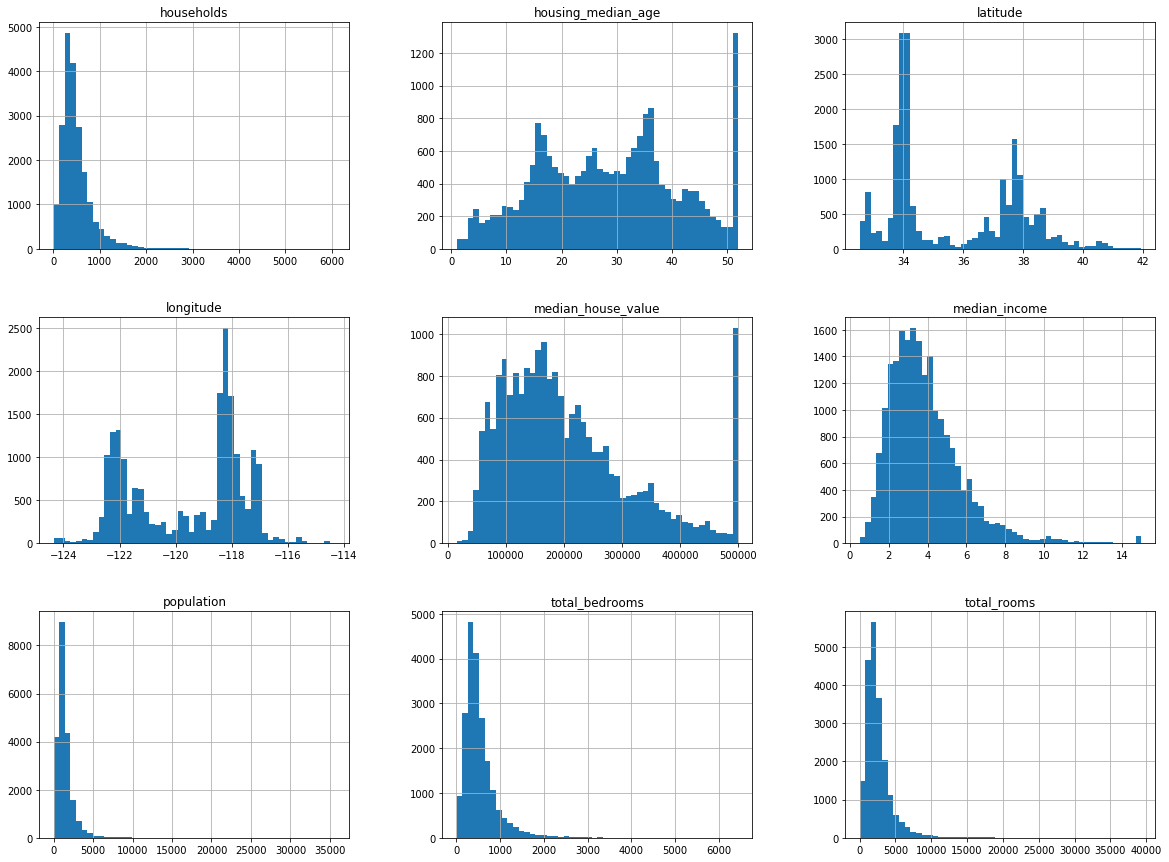

In [54]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Creating a Test Set 
it will be used at the end

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

It is possible to see that in median_income majority of the data is btw 1.5 and 6. We needt to do categories to stratify the data

So I am going to create an income category 

In [67]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5,5.0,inplace=True)

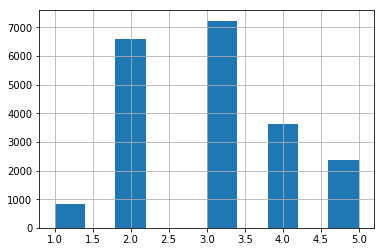

In [68]:
housing["income_cat"].hist()

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

In [69]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X= housing, y= housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [74]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

Now we have the test and the set stratified, it is time to remove "income_cat"

In [76]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis= 1, inplace= True)

### Discover and Visualize the Data to Gain Insights

In [77]:
housing = strat_train_set.copy()

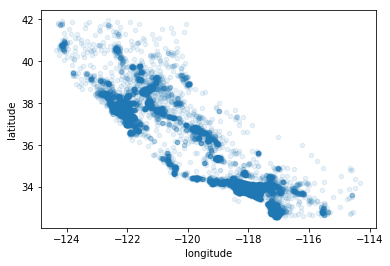

In [81]:
housing.plot(x= "longitude", y= "latitude", kind="scatter", alpha = 0.1)

Text(0.5, 1.0, 'Map with more info')

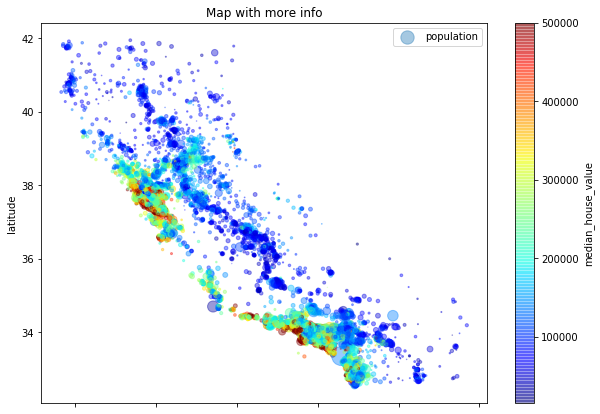

In [84]:
housing.plot(x= "longitude", y= "latitude", kind="scatter", alpha = 0.4,
             s= housing["population"]/100, label= "population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.title("Map with more info")

Looking for Correlations

In [85]:
corr_matrix = housing.corr()

In [90]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

**IS better if we see those numbers in a matrix**

In [91]:
from pandas.plotting import scatter_matrix

In [94]:
list(corr_matrix.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [98]:
attributes =[  'median_house_value', 'median_income', 'total_rooms', 'housing_median_age' ]

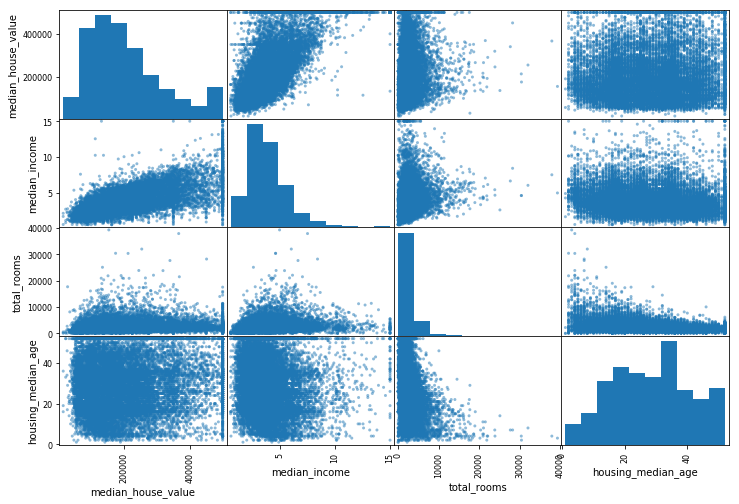

In [99]:
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

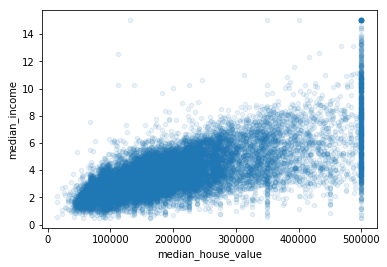

In [100]:
housing.plot(kind="scatter", x="median_house_value", y= "median_income", alpha= 0.1)

seems interesting that there are some kind of boundaries, one obvious in 500k, other in 350k and 280K(less obvious)

Now we are going to calculate some syntetic variables that maybe have more sense and add more info to the dataset

In [101]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [102]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

#### Preparing the data for ML algorithms

our X

In [103]:
housing = strat_train_set.drop("median_house_value", axis= 1)

our y

In [104]:
housing_labels = strat_train_set["median_house_value"].copy()

#### Data Cleaning

we should remember that the total_bendrooms attribute has some missing values, we need to handle them

In [105]:
from sklearn.impute import SimpleImputer

In [106]:
imputer = SimpleImputer(strategy="median")

drop the categorical (object) column because if not, the imputer won't work

In [107]:
housing_num = housing.drop("ocean_proximity", axis= 1)

In [108]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [109]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [111]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [113]:
X = imputer.transform(housing_num)

In [122]:
housing_tr = pd.DataFrame(X, columns= housing_num.colums)

In [123]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.89     37.29                38.0       1568.0           351.0   
1    -121.93     37.05                14.0        679.0           108.0   
2    -117.20     32.77                31.0       1952.0           471.0   
3    -119.61     36.31                25.0       1847.0           371.0   
4    -118.59     34.23                17.0       6592.0          1525.0   

   population  households  median_income  
0       710.0       339.0         2.7042  
1       306.0       113.0         6.4214  
2       936.0       462.0         2.8621  
3      1460.0       353.0         1.8839  
4      4459.0      1463.0         3.0347

#### Handling Text and Categorical Attributes

In [131]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN

In [133]:
from sklearn.preprocessing import OrdinalEncoder

In [134]:
ordinal_encoder = OrdinalEncoder()

In [136]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [138]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

with this approach the algorithms will assume that 0 is closed to 1 than to 4  wich isn't true

***Better for this sceneario is OneHot Encoder***

In [139]:
from sklearn.preprocessing import OneHotEncoder

In [140]:
cat_encoder = OneHotEncoder()

In [141]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [142]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### Custom Transformers

In [143]:
from sklearn.base import BaseEstimator, TransformerMixin

In [144]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [163]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room= True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [151]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling and Transformation Pipelines

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [166]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),
])

In [167]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

***Now we are going to do both, numerical y categorical together***

In [168]:
from sklearn.compose import ColumnTransformer

In [170]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [171]:
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                  ("cat", OneHotEncoder(), cat_attribs),
                                  ])

In [172]:
housing_prepared = full_pipeline.fit_transform(housing)

### Select and Train a Model

In [175]:
from sklearn.linear_model import LinearRegression

In [177]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
some_data = housing.iloc[:5]
some_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN

In [181]:
some_labels = housing_labels.iloc[:5]

In [182]:
some_data_prepared = full_pipeline.transform(some_data)

In [183]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [184]:
print("Labels: ", list(some_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


It is not perfect but it is more or less similar. Let's check the RMSE (error rate)

In [185]:
from sklearn.metrics import mean_squared_error

In [186]:
housing_predictions = lin_reg.predict(housing_prepared)

In [187]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

***This is not a good result, a 68.6k error rate*** 

let's try another model

In [188]:
from sklearn.tree import DecisionTreeRegressor

In [189]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [191]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rsme = np.sqrt(tree_mse)
tree_rsme

0.0

0â‚¬ error?? that is crazy, our model is not possible to be 100% perfect. We should check for another way of train it

***Cross-Validation***

In [192]:
from sklearn.model_selection import cross_val_score

In [198]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [199]:
tree_rmse_scores

array([69279.29736406, 66139.60517302, 72015.31821901, 70240.76960283,
       70702.49630454, 75045.50788655, 70642.7084959 , 70994.9552446 ,
       74967.87542521, 69344.13219369])

In [202]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())

In [203]:
display_scores(tree_rmse_scores)

Scores:  [69279.29736406 66139.60517302 72015.31821901 70240.76960283
 70702.49630454 75045.50788655 70642.7084959  70994.9552446
 74967.87542521 69344.13219369]
Mean:  70937.26659093965
Std:  2514.367937882712


with the Cross Validation it doesn't see very good results. The linear regression model had better score, but let's check it

In [204]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error",cv=10)

In [205]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Std:  2731.6740017983493


Decision Tree model perfoms worst than Linear Regression

Let's try another model

In [206]:
from sklearn.ensemble import RandomForestRegressor

In [207]:
forest_reg = RandomForestRegressor()

In [208]:
forest_reg.fit(housing_prepared, housing_labels)

C:\Users\jfemeniafe001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [209]:
rf_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error",cv=10)

In [210]:
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

Scores:  [51794.72550985 50051.91485986 51190.32838584 55550.86954695
 52769.48735567 57015.89204823 51977.11844122 49406.31324811
 55636.88114718 53457.73755416]
Mean:  52885.12680970745
Std:  2389.515493095453


### Fine-Tune Your Model

#### Grid Search